#**Stock Price Prediction by LSTM**
**Abdallah Fekry Mohammed**

**Code Casa**

**AAPL** for the last 6 monthes from 20/4/2023 to 20/10/2023


In [274]:
import pandas as pd
df = pd.read_csv('/content/AAPL (2).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-20,143.020004,145.889999,142.649994,143.389999,142.544373,64522000
1,2022-10-21,142.869995,147.850006,142.649994,147.270004,146.401489,86548600
2,2022-10-24,147.190002,150.229996,146.000000,149.449997,148.568619,75981900
3,2022-10-25,150.089996,152.490005,149.360001,152.339996,151.441574,74732300
4,2022-10-26,150.960007,151.990005,148.039993,149.350006,148.469223,88194300


In [275]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-10-13,181.419998,181.929993,178.139999,178.850006,178.850006,51427100
247,2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000
248,2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400
249,2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400
250,2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59245300


In [276]:
d = df.iloc[:,1:2]
d.head()

,Open
0,143.020004
1,142.869995
2,147.190002
3,150.089996
4,150.960007


In [277]:
d.shape

(251, 1)

In [278]:
d.head()

,Open
0,143.020004
1,142.869995
2,147.190002
3,150.089996
4,150.960007


In [279]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
d=scalar.fit_transform(d)
d

array([[0.2422042 ],
       [0.24006824],
       [0.30158051],
       [0.34287332],
       [0.35526134],
       [0.31411084],
       [0.31596175],
       [0.38658694],
       [0.41392566],
       [0.32664095],
       [0.22853475],
       [0.22896189],
       [0.15805209],
       [0.2050406 ],
       [0.17784419],
       [0.21685893],
       [0.28207325],
       [0.32692579],
       [0.37320231],
       [0.32920407],
       [0.29075879],
       [0.37448377],
       [0.34387015],
       [0.31496514],
       [0.33376042],
       [0.31752805],
       [0.27239066],
       [0.26028749],
       [0.219137  ],
       [0.31610429],
       [0.2840667 ],
       [0.30983912],
       [0.29987191],
       [0.23038587],
       [0.23280647],
       [0.23252162],
       [0.23764765],
       [0.3344724 ],
       [0.27538094],
       [0.21500781],
       [0.15207176],
       [0.12957424],
       [0.07660539],
       [0.09924525],
       [0.11875272],
       [0.06991308],
       [0.07646309],
       [0.052

In [280]:
len(d)

251

In [281]:
train = d[:200]
test = d[200:]
print("train shape:",train.shape,"\ntest shape:",test.shape)

train shape: (200, 1) 
test shape: (51, 1)


In [282]:
print("train length:",len(train),"\ntest length:",len(test))

train length: 200 
test length: 51


In [283]:
import numpy as np
def createDS(ds, ts=30):
  x = []
  y = []
  for i in range(len(ds) - ts):
    a = ds[i:(i + ts)]
    x.append(a)
    b = ds[(i + ts)]
    y.append(b)
  return np.array(x), np.array(y)

In [284]:
x_train, y_train = createDS(train,30)
x_test, y_test = createDS(test,30)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape,sep='\n')

(170, 30, 1)
(170, 1)
(21, 30, 1)
(21, 1)


In [285]:
import numpy as np
np.where(x_train==y_train[0])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
        12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]))

In [286]:
y_train[0]

array([0.2840667])

In [287]:
x_train[1][-1]

array([0.2840667])

In [288]:
x_train.shape

(170, 30, 1)

In [289]:
# x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
# x_train.shape

In [290]:
# x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
# x_test.shape

In [291]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(30,1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 30, 50)            10400     
                                                                 
 lstm_31 (LSTM)              (None, 30, 50)            20200     
                                                                 
 lstm_32 (LSTM)              (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [292]:
from keras.callbacks import EarlyStopping
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train,y_train,epochs=200, verbose=1, validation_data=[x_test,y_test],
          callbacks=EarlyStopping(patience=50,restore_best_weights=True))

Epoch 1/200
6/6 [==============================] - 8s 312ms/step - loss: 0.2197 - val_loss: 0.0048
Epoch 2/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0499 - val_loss: 0.0290
Epoch 3/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0195 - val_loss: 0.0204
Epoch 4/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0256 - val_loss: 0.0042
Epoch 5/200
6/6 [==============================] - 0s 55ms/step - loss: 0.0138 - val_loss: 0.0334
Epoch 6/200
6/6 [==============================] - 0s 87ms/step - loss: 0.0118 - val_loss: 0.0045
Epoch 7/200
6/6 [==============================] - 1s 94ms/step - loss: 0.0107 - val_loss: 0.0048
Epoch 8/200
6/6 [==============================] - 1s 94ms/step - loss: 0.0081 - val_loss: 0.0193
Epoch 9/200
6/6 [==============================] - 1s 98ms/step - loss: 0.0079 - val_loss: 0.0114
Epoch 10/200
6/6 [==============================] - 1s 91ms/step - loss: 0.0072 - val_loss: 0.0095
Epoch 11/200
6/6 [

In [293]:
x_test.shape

(21, 30, 1)

In [294]:
yp = model.predict(x_test)
yp.shape

1/1 [==============================] - 1s 1s/step


(21, 1)

In [295]:
yp_train = model.predict(x_train)
yp_train.shape

6/6 [==============================] - 0s 14ms/step


(170, 1)

In [296]:
yp_train=scalar.inverse_transform(yp_train)
yp=scalar.inverse_transform(yp)

y_train=scalar.inverse_transform(y_train)
y_test=scalar.inverse_transform(y_test)

In [297]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
loss_train = mean_squared_error(yp_train,y_train)
loss_test = mean_squared_error(yp,y_test)
print("MSE for Train set:",loss_train,"\nMSE for Test set:",loss_test)

MSE for Train set: 15.304254910035867 
MSE for Test set: 9.903863372917328


In [314]:
import random as r
# where n is a random index in y_test
n = r.randint(0,len(x_test)-1)
yp1 = model.predict(x_test[n].reshape(1,30,1))
yp1 = scalar.inverse_transform(yp1)
print("at index '{}' in x_test \nPredicted value = {} \nActual value    = {}".format(n, yp1[0,0] ,y_test[n,0]))

1/1 [==============================] - 0s 28ms/step
at index '7' in x_test 
Predicted value = 174.53082275390625 
Actual value    = 171.22000100000002


#Visualization

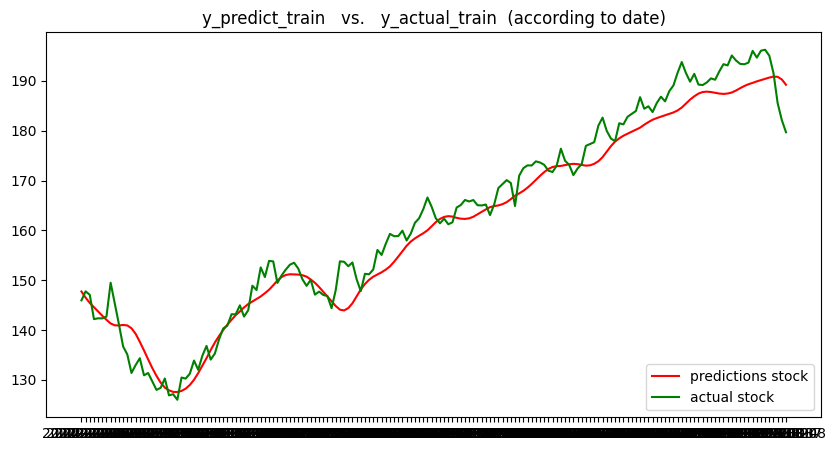

In [307]:
import matplotlib.pyplot as plt
split = 200
time_step = 30
plt.figure(figsize=(10,5))
plt.title('y_predict_train   vs.   y_actual_train  (according to date)')
plt.plot(df.loc[time_step:split-1,'Date'],yp_train, color='r', label='predictions stock')
plt.plot(df.loc[time_step:split-1,'Date'],y_train, color='green', label='actual stock')
plt.legend(loc='lower right')
plt.show()